# Housing Price Forecasting with the Help of Random Forests
Housing prices vary significantly year after year and continue to do so throughout multiple generations. Housing prices are notoriously hard to understand. Being affected by a multitude of variables including location, architecture, and even being affected by the national housing market, it is easy to see how complex data analytics in this field can be. Thankfully, continual improvements in the field of machine learning, we are more equipped than ever to tackle many of the complex problems which we have been faced with for many years.  
  
Throughout this project, we will embark through on a journey through the dynamic realm of the California housing market. Armed with the tools granted to us by machine learning, we will navigate the intricacies of the California Housing dataset and unveil the potential of Random Forests in predicting median housing prices. We will walk through and end-to-end machine learning project, detailing steps from data exploration and preprocessing to the practical application of Random Forests in a regression task.  
  
# The Data
Usually in these types of projects, I would begin with all the imports we will need for the entire project. However, today, let's take a bit of a detour from our usual route and import the packages as we need them. Hopefully, this will let the post seem more linear, and you (the reader) will not have to jump around anywhere to see packages which are required for a specific step in our project.  
  
To begin, we will load and take a look at the data we will be using. The data we will be using today is the California Housing dataset (available from sklearn). This dataset is commonly used for testing out regression models. Let's start by loading it in from the sklearn package. We will set *as_frame* to True when loading the dataset, so that the data is returned as a pandas dataframe.

In [6]:
# Import
from sklearn.datasets import fetch_california_housing
import pandas as pd

# fetch the dataset and store it as a frame
cali_housing = fetch_california_housing(as_frame = True)
print(type(cali_housing))

<class 'sklearn.utils._bunch.Bunch'>


The fetch_california_housing() function returns an sklearn bunch object which has some nice properties which we can take a look at. In the properties, we have a short description of the dataset we can take a look at. Let's now print out the description and see what is going on.

In [7]:
# Print dataset description
print(cali_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Great! We get some dataset characteristics and even a reference for the dataset.  
  
This dataset was originally derived from the 1990 U.S. census, with each row detailing the data for a census block group. The dataset contains 20640 total samples, with each sample having 8 numeric attributes (or features). The features detail information such as the median income in a block group or the average number of bedrooms per household. Also, note that, our target variable here is the median house value for California districts. This value is expressed as hundeds of thousands of dollars. So, 3 here would mean $300,000. Since our target variable is continous, this means that our machine learning task here is regression. Finally, also note that there are no missing values in this dataset (as written in the description). So, we will not have to deal with missing values! 
  
Now that we know a bit about the dataset, lets take a look at the actual data. The whole dataset can be accessed from our bunch with the *.frame* property.

In [17]:
# Show full dataframe
cali_housing.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


We can now get our features with *.data* and the target variable with *.target*. We will store the features as X and the target as y. Also, using *.values* on each of these will give us a workable numpy array.

In [18]:
# Get features (X) and target (y)
X = cali_housing.data.values
y = cali_housing.target.values

So, that pretty much concludes the amount of work required to process our data. Since there are no missing values, there is no work to be done there. Additionally, since we will be making use of a random forest model, no scaling is necessary. In fact, scaling will not really change anything at all (maybe a slightly faster convergence rate, but that's about it).  

# Some Exploration
With the processing done, we can move into some data exploration. When you go to purchase any home, one of the most important factors to consider is its location. And, in fact, location is usually a large factor in detemining the price of the home as well. Thus, it follows that, we can start to assume that the longitude and latitude of a group of homes in california may be an important factor to consider when predicting its price.  
  
But, this is just an assumption. To check our assumption, we can do a simple scatterplot of our samples using the longitude and latitude attributes. For this, we will first need to import seaborn and matplotlib to make our visualizations. Here, I will also be overlaying the scatteplot on top of a simple outline map of California. This will give us some idea of location. Additionally, when making our seaborn scatterplot, we can change the size and hue of the points according to our target variable (MedHouseValue) to see if the longitude and latitude does actually affect the variable we are trying to predict. The code cell below creates this visualization.

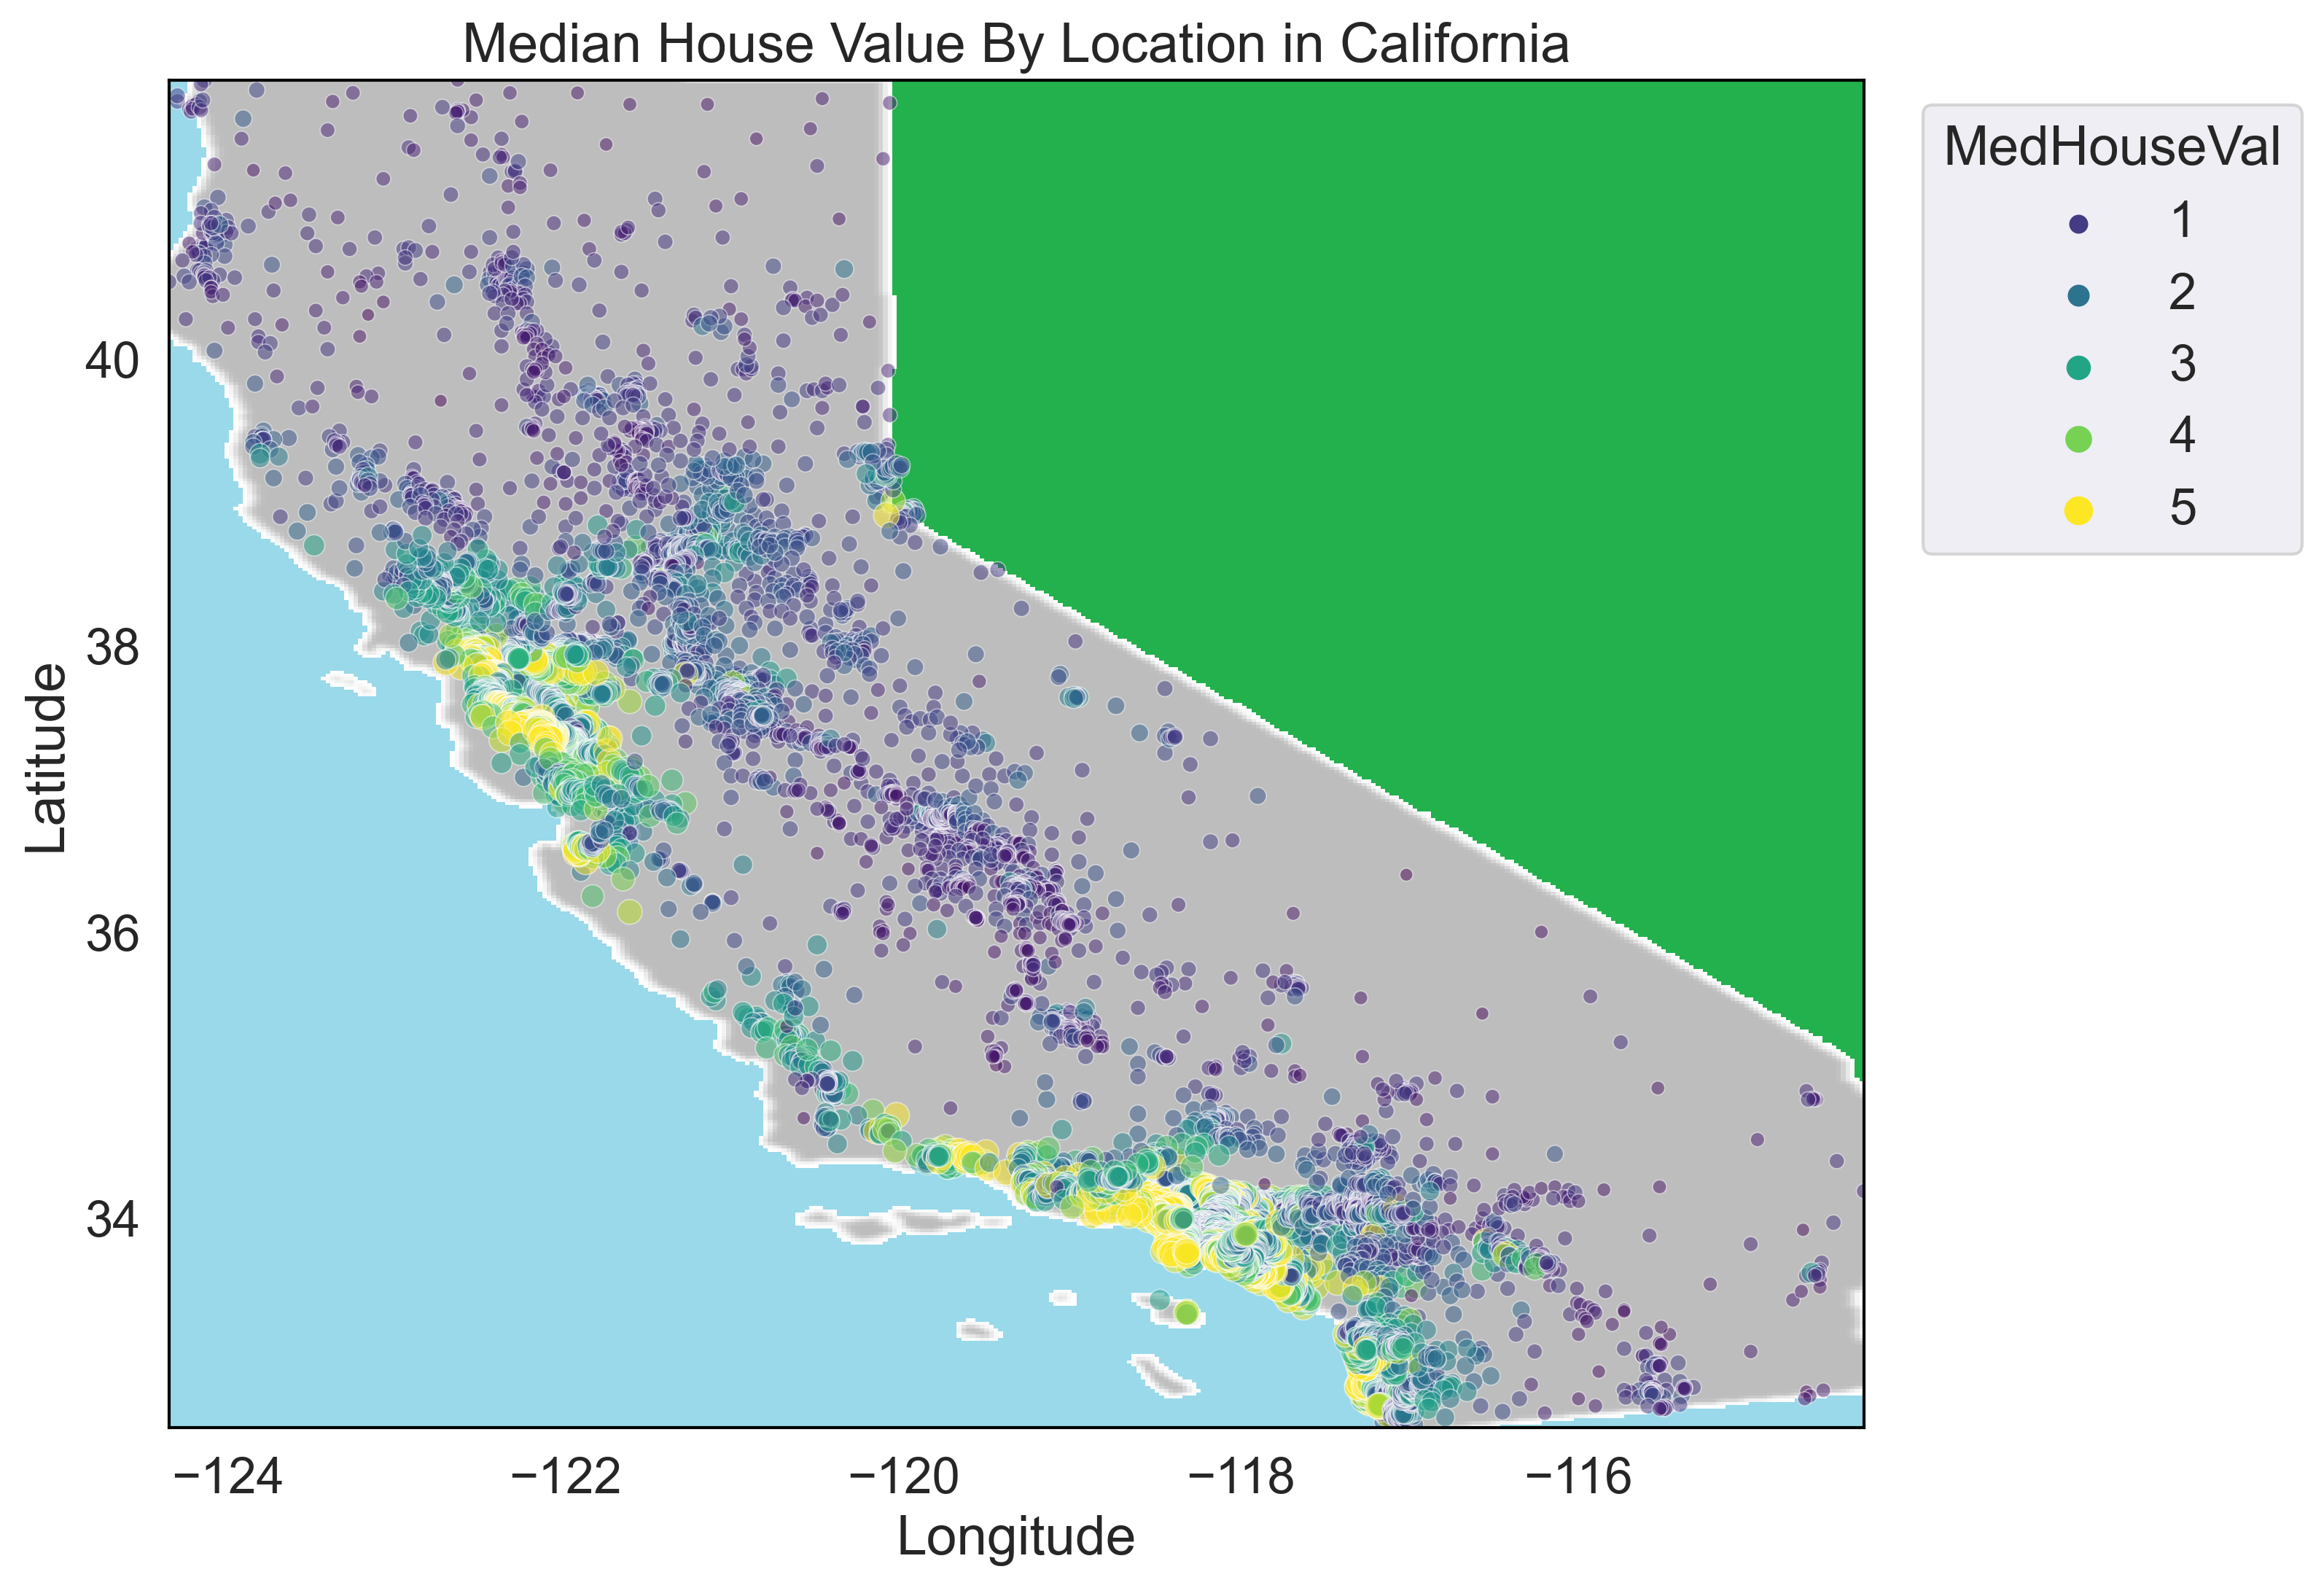

In [55]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt

# Set sns styling
sns.set(style="dark",
        font_scale=1.5)

# Read map png
img = plt.imread('./data/cali_map.png')

# Create figure
plt.figure(figsize=(10, 8), dpi=300)

# Show map png
plt.imshow(img,
           extent=[min(cali_housing.data['Longitude']),
                   max(cali_housing.data['Longitude']),
                   min(cali_housing.data['Latitude']),
                   max(cali_housing.data['Latitude'])],
           aspect='auto',
           cmap='gray')

# Plot longitude and latitude, with size and hue by house value
sns.scatterplot(
    data=cali_housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5
)

# Set legend and title
plt.legend(title="MedHouseVal",
           bbox_to_anchor=(1.02, 1),
           loc="upper left")
plt.title("Median House Value By Location in California")

# Set outside border
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(1)
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth(1)

Taking a look at our visualization, we can confirm our assumption from before. For example, most of the highest valued homes are placed by the coast. If you know anything about the California housing market, this will be no surprise to you. Also, much of the inland empire has a lower median house value. Thus, location is a pretty good predictor of house value. Different median house values are clustered into specific locations around the state of California.  
  
So, it appears that location (a combination of both longitude and latitude) is pretty heavily correlated with median house value. Let's now expand our view a bit and start to look at all the other features in our dataset. What other features are also highly correlated with median house value? To answer this, we can make use of a traditional correlation matrix.  
  
A correlation matrix shows the correlation coefficients (in our case, using pearson correlation) between many variables. Each cell in the matrix represents the correlation between two variables. Here, correlation is a statistical measure which indicates the extent to which two variables change together. In other words, it quantifies the strength and direction of a relationship between the two variables. A correlation positive correlation coefficient means that when one variable increases, so does the other. On the other hand, a negative correlation coefficient means that as one variable increases, the other tends to decrease. Finally, a correlation close to zero indicates a weak (or not any) correlation between the two variables.  
  
In order to visualize a correlation matrix, we will first have to compute the correlation coefficients between every pair variables in our original dataset. Thankfully, computing a correlation matrix is very easy to do with pandas. We will use pandas' corr() function on our full dataset to do this.

In [59]:
# Compute correlation matrix
corr_mat = cali_housing.frame.corr()
corr_mat

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Taking a look at the matrix, we can see that every cell in the diagonal has a value of 1. This is perfectly expected, as every variable will have a perfect correlation with itself. Additionally, note that cells on opposing sides of the diagonal contain the same values. For instance, the value in cell (MedInc, HouseAge) is the same as the value in cell (HouseAge, MedInc). This is simply due to how the matrix is generated. So, we can easily get away with only visualizing the lower triangle of the matrix, as the upper triangle is exactly the same.  
  
To visualize the plot, we will again make use of matplotlib as well as seaborn. First, however, we will have to generate a mask for the upper triangle so that we do not show it and make the visualization more confusing than it has to be. This will also get rid of our meaningless diagonal full of 1s. For visualizing the matrix, we will use a heatmap with a diverging color palette. The color palette is best as a diverging one because this will make it easy to pick out positive versus negative correlations in our visualization. We will be using a built-in diverging color palette from seaborn called 'vlag_r'. This way, positive correlations will be blue with the negatives being red. No correlation cells will be white. The following code cell creates this visualization.

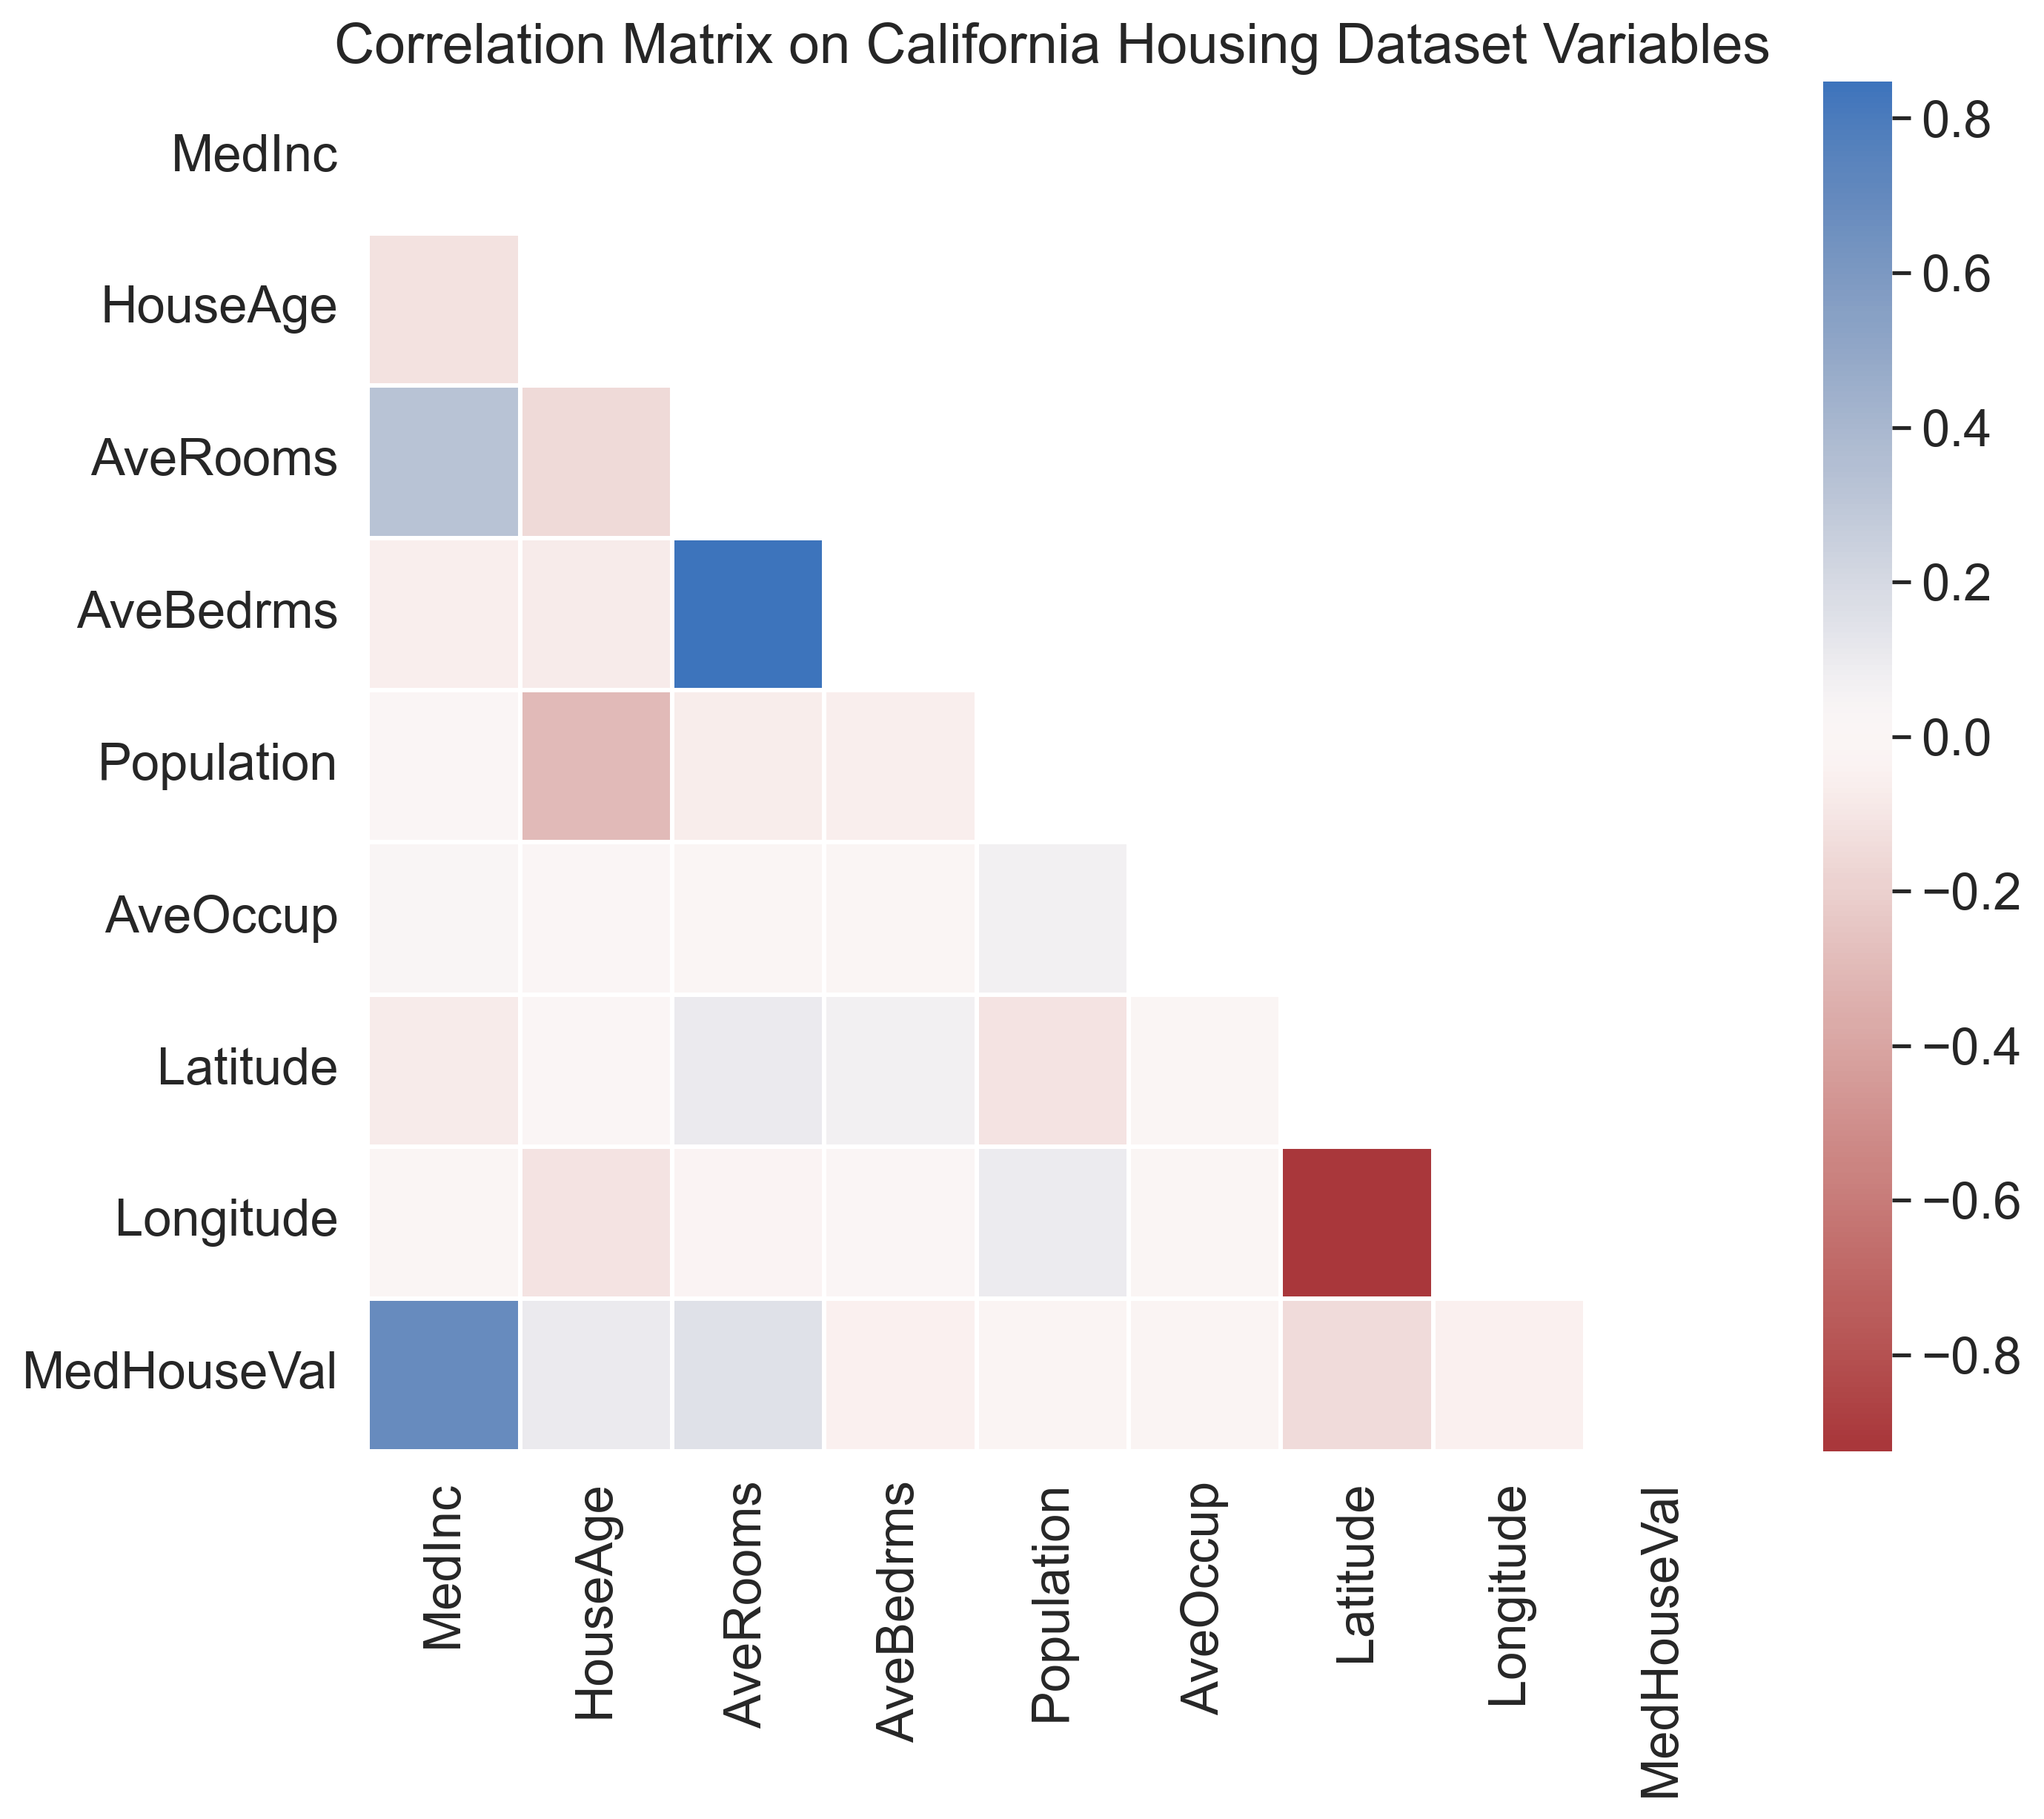

In [66]:
# Imports
import numpy as np
import seaborn as sns

# Set sns styling
sns.set(style="white",
        font_scale=1.5)

# Create a mask for the upper triangle
tr_mask = np.triu(np.ones_like(corr_mat, dtype = bool))

# Create figure
plt.subplots(figsize=(10, 8), dpi=300)

# Create viz for corr matrix
sns.heatmap(corr_mat,          # Correlation Matrix
            mask = tr_mask,    # Mask
            cmap = 'vlag_r',   # Color Palette
            center = 0,        # Center color palette to 0 value
            square = True,     # Set cells to be squares
            linewidths = 1)  # Set line widths

# Set title
plt.title("Correlation Matrix on California Housing Dataset Variables");

Now, you might be confused as to why latitude and longitude do not show heavy correlations with the median house value after we had that whole section above this. Well, in reality, any change in the actual values for longitude and latitude themselves may not be related to changes in the median house values. In the visualization before, we saw that very specific values for longitude and latitude (those related to coastal areas) were indicative of high house prices. Despite this, increasing latitude or longitude alone, does not directly change the housing prices. In short, this correlation matrix does not tell us the whole story. This is why we are doing it along with the other visualization.. so we can try to see the larger picture. Note that, this does not mean that the latitude and longitude are not important features in predicting median house incomes. Rather, this just tells us that the actual values for these features are not highly correlated with the value for MedHouseVal.  
  
On another note, one thing we can take away from this visualization is that median income has a high positive correlation with median house value. Thus, as median income increases, so does the median house value. So, we can takeaway the fact that MedInc may be another good predictor of median house value (along with the longitude and latitude from the analysis we did before).  
  
# Applying a Random Forest Regressor
Yes, I know this section is titled "Applying a Random Forest Regressor", but before that, we should at least know what a random forest model is. A random forest is an ensemble model containing many decision trees. It works by constructing multiple decision trees during training and outputs the average prediction from these trees as its prediction. The ensemble approach helps overcome some overfitting problems, as it uses not just one model to make its predictions. A decision tree, for those who don't know, if like a flowchart, where decisions are made by recusively splitting the data into subsets based on a set of inferred rules, ultimately leading to a predicted outcome. A simple decision tree for the XOR function is below:

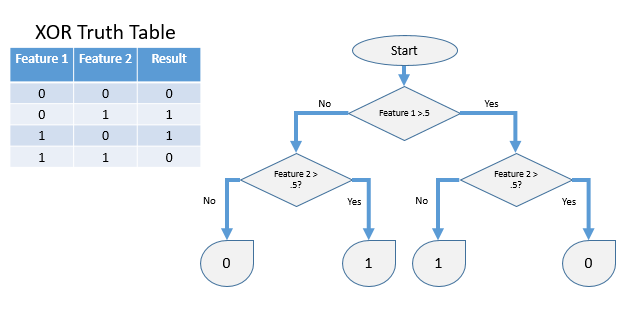  
  
With that out of the way, let's talk about hyperparameters. A couple of important hyperparameters for a random forest model are:
- Number of trees in the ensemble
- Number of features to consider when looking for the best split
- Maximum depth of a tree
  
Along with these there are a multitude of other hyperparameters which you could change to alter the behavior of the Random Forest Model. Changing these may or may not change the model's performance, but for sake of brevity in this post we will only try and tune the 3 parameters above. 
  
There are a ton of ways to tune hyperparameters (bayesian optimization, random search, etc.), but today we will be working with a grid search. Grid search involves defining a grid of hyperparameter values to explore, and then training and evaluating a model with these hyperparameters. This is an exhaustive search over the hyperparameter space that we manually define. We will be using grid search cross validation (GridSearchCV from sklearn) for our purposes. The CV part means that the models will be evaluated with cross-validation. With cross validation, the original dataset is divided into multiple subsets (or folds) and the model is trained and evaluated multiple times using differents folds for training and testing. This helps evaluations by reducing the impact of variations due to data splitting.  
  
To start off, our first step is to split our original data into train and test sets. For this, we will make use of sklearn's train_test_split() method. We will use 1/4 of our original data for final evaluations. This splitting will ensure that no data leakage has occured and our model will be properly evaulated on unseen data. Random state is set to make this project reproducible.

In [69]:
# Import
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 1/4,
                                                    random_state = 42)

After this, let's define our hyperparameter search space. For the number of trees in our ensemble, we can set up a simple geometric series and simply doubling the number each time from 100 to 400. Regarding the number of features to consider when looking for the best split, our maximum is the number of features in our dataset (8). So, let's define an array from 4 to 8 by 2 for this. Finally, for bounding the maximum depth of a decision tree, we can set the minimum number of samples required to split an internal node. The default is 2, so we will set up list from 2 to 4. Keeping our search space small will let shorten the search time significantly. The downside to this is that may not find the optimal parameters, just the optimal ones for our search space. If you are doing this for a project, I suggest trying to keep the search space as much as possible, but still ensuring that you are nearby the optimal parameters. The code below sets up the parameter grid, for the search space we just decided on.

In [91]:
# Define hyperparameter space
params = {'n_estimators' : [100, 200, 400],
          'max_features' : [4, 6, 8],
          'min_samples_split' : [2, 3, 4]}

With the parameter space now defined, we can run our grid search. For evaulating our predictions, we will use the r2 score. Otherwise known as the coefficient of determination, this score is a measure of how well the regression line approximates the actual data. It is the proportion of the variation in the dependent variable which is predictable from the independent variables. In other words, it evaluates the scatter of the data points around the regression line. The best possible score is 1. We will use 4-fold cross validation here. After we create the grid search object, we will run the fit() function to run the grid search. Please note that running the grid search may take some time. In the meantime, check this out 🐕.
  
Here, we will have to import the RandomForestRegressor and GridSearchCV from sklearn.

In [92]:
# Imports
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Set up grid search
grid_search = GridSearchCV(estimator = RandomForestRegressor(),
                           param_grid = params,
                           verbose = 3,
                           cv = 4,
                           scoring = 'r2')

# Run grid search
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
[CV 1/4] END max_features=4, min_samples_split=2, n_estimators=100;, score=0.811 total time=  12.9s
[CV 2/4] END max_features=4, min_samples_split=2, n_estimators=100;, score=0.806 total time=  13.0s
[CV 3/4] END max_features=4, min_samples_split=2, n_estimators=100;, score=0.814 total time=  13.1s
[CV 4/4] END max_features=4, min_samples_split=2, n_estimators=100;, score=0.804 total time=  13.6s
[CV 1/4] END max_features=4, min_samples_split=2, n_estimators=200;, score=0.812 total time=  26.1s
[CV 2/4] END max_features=4, min_samples_split=2, n_estimators=200;, score=0.805 total time=  26.0s
[CV 3/4] END max_features=4, min_samples_split=2, n_estimators=200;, score=0.817 total time=  27.9s
[CV 4/4] END max_features=4, min_samples_split=2, n_estimators=200;, score=0.808 total time=  26.4s
[CV 1/4] END max_features=4, min_samples_split=2, n_estimators=400;, score=0.813 total time=  52.7s
[CV 2/4] END max_features=4, min_sampl

[CV 3/4] END max_features=8, min_samples_split=2, n_estimators=400;, score=0.807 total time= 1.6min
[CV 4/4] END max_features=8, min_samples_split=2, n_estimators=400;, score=0.801 total time= 1.6min
[CV 1/4] END max_features=8, min_samples_split=3, n_estimators=100;, score=0.802 total time=  22.9s
[CV 2/4] END max_features=8, min_samples_split=3, n_estimators=100;, score=0.792 total time=  22.0s
[CV 3/4] END max_features=8, min_samples_split=3, n_estimators=100;, score=0.805 total time=  22.4s
[CV 4/4] END max_features=8, min_samples_split=3, n_estimators=100;, score=0.800 total time=  22.6s
[CV 1/4] END max_features=8, min_samples_split=3, n_estimators=200;, score=0.804 total time=  44.5s
[CV 2/4] END max_features=8, min_samples_split=3, n_estimators=200;, score=0.793 total time=  44.9s
[CV 3/4] END max_features=8, min_samples_split=3, n_estimators=200;, score=0.807 total time=  44.7s
[CV 4/4] END max_features=8, min_samples_split=3, n_estimators=200;, score=0.799 total time=  45.2s


GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_features': [4, 6, 8],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 400]},
             scoring='r2', verbose=3)

Once the grid search is done, we can print the best parameters and the best score. We can also get the model from the grid search which scored the highest. So, let's do that next.

In [93]:
# Print out best parameters with best score
print('---Best Parameters From Grid Search---')
print('\n'.join([f'{param}: {value}' for param, value in grid_search.best_params_.items()]))

print('\n---Best Score---')
print(grid_search.best_score_)

# Save best model
best_rf = grid_search.best_estimator_

---Best Parameters From Grid Search---
max_features: 4
min_samples_split: 2
n_estimators: 400

---Best Score---
0.8106844400225436


# Evaluations
From the grid search, we know the best r2 score that we were able to get on the training set. Now, with the best model from the grid search (which is already trained), we can evaluate the model on the testing set that we split off earlier. For the predictions on the test set (X_test), we will compare it with the correct values (y_test). Instead of just scoring the model with the r2 score, let's compute some other popular regression metrics. Along with the r2 score, we will compute the mean absolute error (MAE) and the root mean squared error (RMSE). MAE is simply the average of the absolute differences between the actual target values and the predicted values. RMSE is the square root of MSE, and MSE is the average squared difference between the target and predicted values. To compute MAE, we can simply use the mean_absolute_error() function from sklearn. For RMSE, we will compute MSE with mean_squared_error() function and then take the square root. So that we don't have to keep computing and printing metrics, we can create a helper function to do it for us.

In [96]:
# Imports
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# Helper function to compute and print regression metrics
def print_reg_metrics(y_true, y_pred):
    # Compute R2, MAE, and RMSE
    r2 = r2_score(y_true, y_pred)
    mae_score = mean_absolute_error(y_true, y_pred)
    rmse_score = sqrt(mean_squared_error(y_true, y_pred))
    
    # Print Eval Metrics
    print('+-----------------------------------+')
    print('|  Evaluation Metrics for Test Set  |')
    print('+-----------------------------------+')
    print('|'+f'{"R2": <5}= {r2: .3f}'.center(35)+'|')
    print('|'+f'{"MAE": <5}= {mae_score: .3f}'.center(35)+'|')
    print('|'+f'{"RMSE": <5}= {rmse_score: .3f}'.center(35)+'|')
    print('+-----------------------------------+')

Now, we will predict on the test set and print out our evaluation metrics with the help of our new function.

In [97]:
# Get predictions for the test set
y_pred = best_rf.predict(X_test)

# Use helper function to compute and print metrics
print_reg_metrics(y_test, y_pred)

+-----------------------------------+
|  Evaluation Metrics for Test Set  |
+-----------------------------------+
|           R2   =  0.817           |
|           MAE  =  0.322           |
|           RMSE =  0.493           |
+-----------------------------------+


Looks good! Our RMSE tells us that our random forest model explains 81.7% of the variation in the response variable around its mean. Not bad at all! With 0.322 for MAE, we can say that our model predicts a median housing value that is, on average, about \$32,200 off of the actual value. For RMSE, we can say that the square root of the variance of the residuals (the differences between the actual values and the predicted values) is 0.493.  
  
Now, these seem to be pretty good metrics. But, how does our model compare to some other form of regression technique? To find out, we can create a simple linear regression model as a baseline and then compare our evaluation metrics (this is why I decided to make that helper function lol). sklearn implements a linear regression model, so we will make use of that.

In [99]:
# Imports
from sklearn.linear_model import LinearRegression

# Create linear model and train
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Print eval metrics
print_reg_metrics(y_test, y_pred)

+-----------------------------------+
|  Evaluation Metrics for Test Set  |
+-----------------------------------+
|           R2   =  0.591           |
|           MAE  =  0.530           |
|           RMSE =  0.736           |
+-----------------------------------+


Well, as you probably expected, the random forest model far outclasses a simple linear regression model for this task. The r2 score is about 20% less. Both errors are also around 20% greater when using the linear regression.  
  
This is likely because there is some more complex, or non-linear, relationships which the random forest was able to learn but the linear regression was not. All in all, using a more complex model was benefitial here. However, it may not always be, so be sure to understand the data and try multiple models out with your own projects.  
  
# Conclusion
Today in this post, we have walked through how you could go about applying a random forest model for a regression problem. We dove into some data exploration and visualizations, some hyperparameter tuning, and even pitted our model against a baseline to assess performance.  
  
To end this post off, our journey through the application of a random forest regressor model on the California Housing dataset has been both insightful and practical. We navigated the intricacies of every step in a typical machine learning project and navigated the intricacies of this simple, but powerful, ensemble-based model. By applying this model, we were able to unlock the potential for making accurate predictions with a dataset containing some pretty complex feature relationships. The ensemble nature of our model has proven its viability in classic regression tasks due to its resilience against overfitting and ability to capture intricate patterns within the data. As we continue in our lives, away from this post equipped with newfound knowledge, you and I are both better equipped to unravel the complexities of predictive modeling and contribute to this weird new realm we call machine learning. If you ever wanted to learn more about a topic, try and write a blog post about it. Although this is written for educational purposes (if anyone is able to find it), I have learned a ton while writing here. Hopefully, you were able to follow along easily with this project and are now more learned than you were before. To sign off once again, have fun out there kid. The world is tough, but you are tougher.  
  
₍ᐢ•ᴥ•ᐢ₎